In [1]:
# Import all the packages required in the script

%matplotlib widget
import mne
import numpy as np
import pandas as pd
from pathlib import Path

In [21]:
# Subject ID
sub='100301'

# 1 load the data
datafile = Path.cwd().parent / "data" / f'remcode{sub}.bdf'
raw = mne.io.read_raw_bdf(datafile, preload=True)

# 2 inspect data
# raw.plot(duration=5, n_channels=72)

Extracting EDF parameters from /Users/chenyu/Data_analysis/2024-EEG-removal/data/remcode100301.bdf...
Extracting EDF parameters from /Users/chenyu/Data_analysis/2024-EEG-removal/data/remcode100301.bdf...


BDF file detected
BDF file detected


Setting channel info structure...
Setting channel info structure...


Creating raw.info structure...
Creating raw.info structure...


Reading 0 ... 1532927  =      0.000 ...  1496.999 secs...
Reading 0 ... 1532927  =      0.000 ...  1496.999 secs...


In [23]:
# 3 add channel locations
biosemi_montage = mne.channels.make_standard_montage('biosemi64')
# biosemi_montage.plot(show_names=True)
raw.set_montage(biosemi_montage, on_missing='warn')

# plot to check sensor
# raw.plot_sensor()

<positron-console-cell-23>:4: RuntimeWarning: DigMontage is only a subset of info. There are 8 channel positions not present in the DigMontage. The channels missing from the montage are:

['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.


<RawEDF | remcode100301.bdf, 73 x 1532928 (1497.0 s), ~853.8 MB, data loaded>

EEG channel type selected for re-referencing
EEG channel type selected for re-referencing


Applying a custom ('EEG',) reference.
Applying a custom ('EEG',) reference.


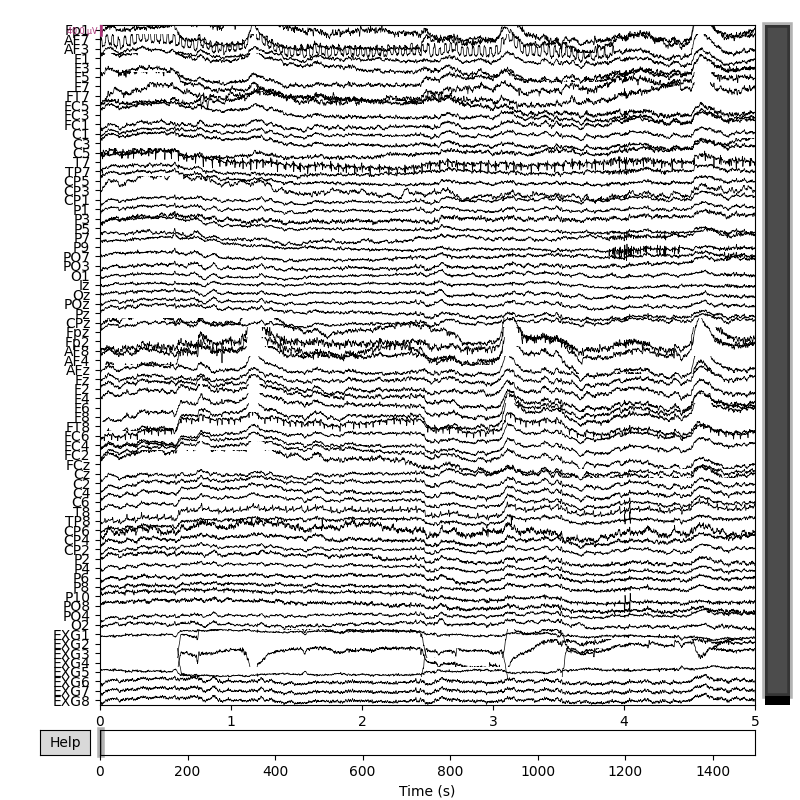

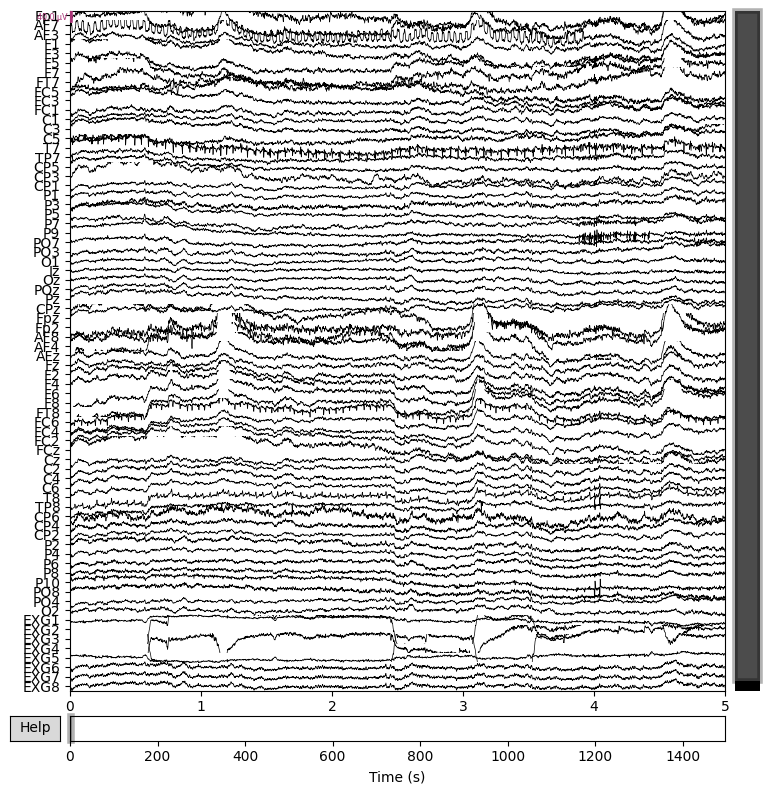

In [4]:
# 4 re-reference and plot
ref_channels = ['EXG1','EXG5'] # left and right
raw_ref,_ = mne.set_eeg_reference(raw, ref_channels)
raw_ref.plot(duration=5, n_channels=72)

In [5]:
# 5 downsample to 500 hz
raw_ref_ds = raw_ref.copy().resample(500)

Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)


Removing orphaned offset at the beginning of the file.
Removing orphaned offset at the beginning of the file.


764 events found on stim channel Status
764 events found on stim channel Status


Event IDs: [1 2 3 4 5 7]
Event IDs: [1 2 3 4 5 7]


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)


Removing orphaned offset at the beginning of the file.
Removing orphaned offset at the beginning of the file.


764 events found on stim channel Status
764 events found on stim channel Status


Event IDs: [1 2 3 4 5 7]
Event IDs: [1 2 3 4 5 7]


In [6]:
# 6 get events after downsampling
events = mne.find_events(raw_ref_ds)
## if you wanna correct event labels
# events[events[:, 2] == 129, 2] = 1

Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)


Removing orphaned offset at the beginning of the file.
Removing orphaned offset at the beginning of the file.


764 events found on stim channel Status
764 events found on stim channel Status


Event IDs: [1 2 3 4 5 7]
Event IDs: [1 2 3 4 5 7]


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.


Filtering raw data in 1 contiguous segment
Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.1 - 40 Hz
Setting up band-pass filter from 0.1 - 40 Hz


FIR filter parameters
FIR filter parameters


---------------------
---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:
Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method
- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.10
- Lower passband edge: 0.10


- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)


- Upper passband edge: 40.00 Hz
- Upper passband edge: 40.00 Hz


- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)


- Filter length: 16501 samples (33.002 s)
- Filter length: 16501 samples (33.002 s)


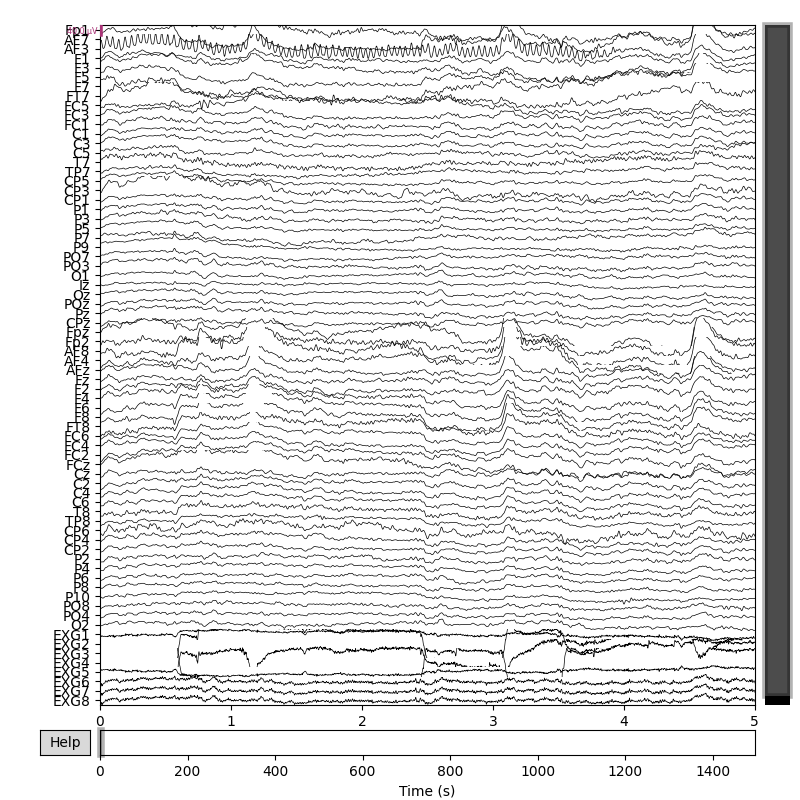

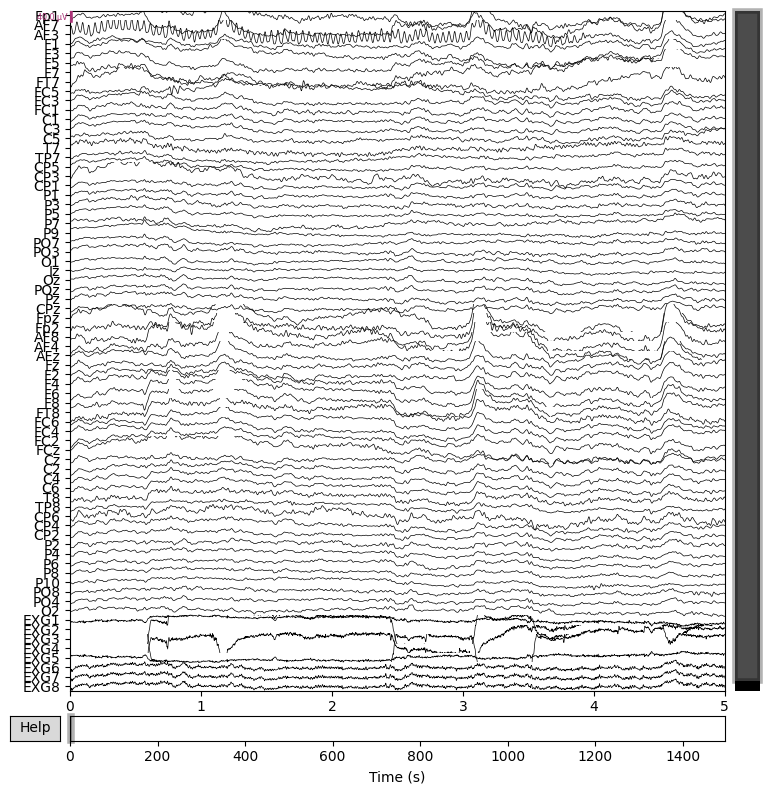

In [10]:
# 6 bandpass filter [0.1,40] except for EXTRA channels
l_freq = 0.1
h_freq = 40
eeg_chan_num =64
# pick_ch =np.arange(0,eeg_chan_num,dtype = int).tolist()
pick_ch = [i for i in range(eeg_chan_num)]
raw_ref_ds_fil = raw_ref_ds.copy().filter( l_freq=l_freq,h_freq = h_freq,picks = pick_ch)
raw_ref_ds_fil.plot(duration=5, n_channels=72)

# plot to check the filtered data
# raw.plot_psd(area_mode='range', tmax=10.0,picks = np.arange(0,eeg_chan_num,dtype = int).tolist(), average=False)
# raw_ref_ds_fil.plot_psd(area_mode='range', tmax=10.0,picks = np.arange(0,eeg_chan_num,dtype = int).tolist(), average=False)

In [13]:
# 7 epoch
# create event code dictionary bins
event_dict = {
    # "other": 0,
    "letter": 1,
    "character": 2,
    "animal": 3,
    "fruit": 4,
    "furniture": 5,
    # "vehicle": 6,
    "face": 7}
timings = {
    "letter": 1.05,
    "character": 1.05,
    "animal": 1.05,
    "fruit": 1.05,
    "furniture": 1.05,
    # "vehicle": 1.05,
    "face": 1.05
        }

# visualize events
#fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw_ref_ds_fil.info['sfreq'],first_samp=raw_ref_ds_fil.first_samp)

## epoch
epoch_dict = {'letter': 1}
int_time = [-0.2,1.05]
#epochs = mne.Epochs(raw_ref, events, event_id=event_dict, tmin=-0.2, tmax=0.5,reject=reject_criteria, preload=True)
epochs = mne.Epochs(raw_ref_ds_fil, events,event_id=event_dict, tmin=int_time[0], tmax=int_time[1], preload=True, baseline= None)
# epochs.save(datapath + '/' + i + '/' + i + '-_beforedrop_epo.fif',overwrite='True')

Not setting metadata
Not setting metadata


764 matching events found
764 matching events found


No baseline correction applied
No baseline correction applied


0 projection items activated
0 projection items activated


Using data from preloaded Raw for 764 events and 626 original time points ...
Using data from preloaded Raw for 764 events and 626 original time points ...


0 bad epochs dropped
0 bad epochs dropped


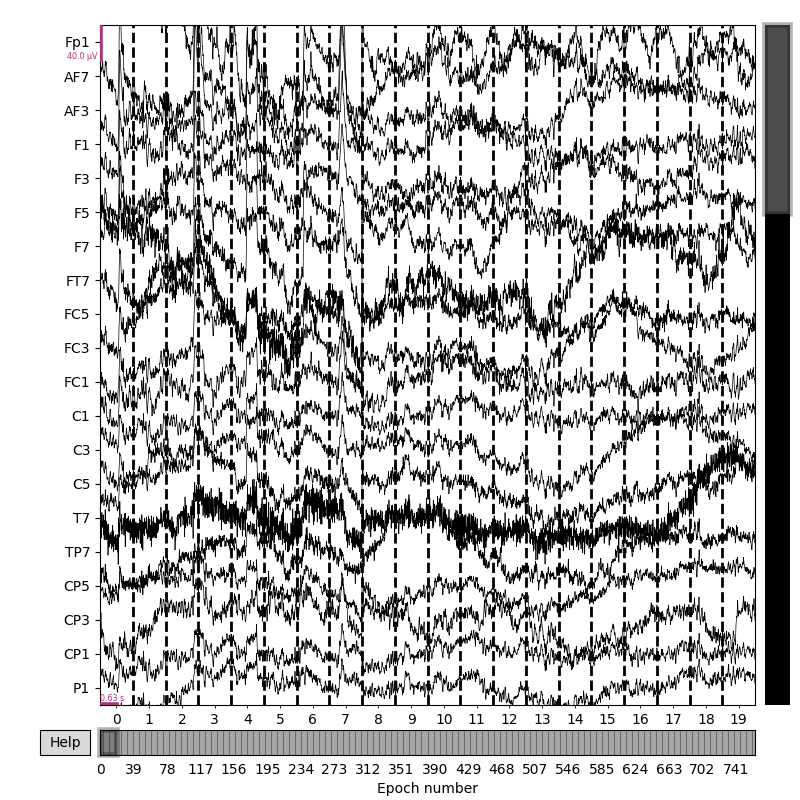

In [18]:
# 8. manually drop epochs and indexs for undropped epochs
epochs_afterdrop = epochs.copy()
epochs_afterdrop.plot()
saveidx = np.where(np.isin(epochs.selection, epochs_afterdrop.selection))[0]
#save
# epochs_afterdrop.save(datapath+'/'+i+'/'+i+'_afterdrop-epo.fif',overwrite='True')
# sub_info = {
#         "sub": i,
#         "epochs": epochs_afterdrop,
#         "trial2save": saveidx,
#     }
# import pickle
# with open(subpath +'/'+i+".pickle", 'wb') as handle:
#         pickle.dump(sub_info, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
epochs

<Epochs | 764 events (all good), -0.2 – 1.05 s (baseline off), ~266.4 MB, data loaded,
 'letter': 126
 'character': 126
 'animal': 126
 'fruit': 134
 'furniture': 126
 'face': 126>